# Title: 

#### Import all necessary libraries. 

In [2]:
import csv

import numpy as np
import pandas as pd
import os

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go

%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

#### Import The JOLTS report. 
##### JOLTS Total Report Summary: The JOLTS (Job Openings and Labor Turnover Survey) Total Report provides data on the number of job openings, hires, and separations in the U.S. labor market. It is used by researchers and economists to assess labor market dynamics, such as job availability and employee turnover rates, which can indicate economic health and help in forecasting trends. The data is crucial for understanding labor demand, identifying skills gaps, and shaping workforce policies.

##### Note: This report includes all sectors. Also, I displayed the Head and the Tail to ensure all data were imported properly. 

In [3]:
jolts_data= pd.read_csv('../SPYJobOpenings/JTSJOL_Monthly.csv')
jolts_data = jolts_data.rename(columns={"JTSJOL": "JTSJOL"})
jolts_data.head(5), jolts_data.tail(5) 

(  observation_date  JTSJOL
 0       2000-12-01    5088
 1       2001-01-01    5234
 2       2001-02-01    5097
 3       2001-03-01    4762
 4       2001-04-01    4615,
     observation_date  JTSJOL
 279       2024-03-01    8355
 280       2024-04-01    7919
 281       2024-05-01    8230
 282       2024-06-01    7910
 283       2024-07-01    7673)

#### *Import SPY Price History 2000-2024* 
##### SPY500 Summary: The SPY500, commonly referred to as the S&P 500 ETF (Exchange-Traded Fund), is a fund that aims to replicate the performance of the S&P 500 Index, which includes 500 of the largest publicly traded companies in the U.S. This ETF is used by both institutional investors and individual investors to gain exposure to a broad and diversified set of U.S. equities. The average annual returns of the S&P 500 have historically been around 10% before inflation, though this can vary widely depending on market conditions. Researchers and economists use the SPY500 to gauge overall market performance and economic health, as it reflects a significant portion of the U.S. equity market. It serves as a benchmark for portfolio performance and investment strategies.

In [4]:
spy_data = pd.read_csv('../SPYJobOpenings/SPYETFStockPriceHistory2000_2024.csv')
spy_data.head(5), spy_data.tail(5)

(         Date   Price    Open    High     Low     Vol. Change %
 0  09/01/2024  562.01  563.68  563.68  539.44  463.88M   -0.30%
 1  08/01/2024  563.68  552.57  564.20  510.27   62.70M    2.34%
 2  07/01/2024  550.81  545.63  565.16  537.45    1.04B    1.21%
 3  06/01/2024  544.22  529.02  550.28  522.60  888.92M    3.20%
 4  05/01/2024  527.37  501.38  533.07  499.55    1.15B    5.06%,
            Date   Price    Open    High     Low     Vol. Change %
 281  04/01/2001  124.91  116.30  127.27  109.30  252.00M    7.04%
 282  03/01/2001  116.69  124.05  127.75  108.04  318.20M   -5.86%
 283  02/01/2001  123.95  137.10  137.99  121.80  178.61M   -9.54%
 284  01/01/2001  137.02  132.00  138.70  127.56  181.34M    4.44%
 285  12/01/2000  131.19  133.19  139.56  125.53  165.52M   -0.82%)

#### *DataTime Function & Inner Join:*
##### - Use Datetime function to format the Dates on both files. Then used the Data Index to create an inner join. 
##### - Inner Join was used to ensure that ensure that only rows with matching dates in both the SPY and JOLTS datasets are included in the merged dataset. This is important because it focuses the analysis on periods where both datasets have data, avoiding mismatches or missing data that could skew the results. The "inner" join ensures the highest data quality by filtering out non-overlapping dates.

In [5]:
# Preprocess the SPY data: Convert 'Date' to datetime and set it as the index
spy_data['Date'] = pd.to_datetime(spy_data['Date'], format='%m/%d/%Y')
spy_data.set_index('Date', inplace=True)

# Preprocess the JOLTS data: Convert 'observation_date' to datetime and set it as the index
jolts_data['observation_date'] = pd.to_datetime(jolts_data['observation_date'])
jolts_data.set_index('observation_date', inplace=True)

# Merge the SPY and JOLTS data on their date indices
merged_data = pd.merge(spy_data[['Price']], jolts_data, left_index=True, right_index=True, how='inner')

In [6]:
merged_data.head(), merged_data.tail(), merged_data.shape

(             Price  JTSJOL
 2024-07-01  550.81    7673
 2024-06-01  544.22    7910
 2024-05-01  527.37    8230
 2024-04-01  501.98    7919
 2024-03-01  523.07    8355,
              Price  JTSJOL
 2001-04-01  124.91    4615
 2001-03-01  116.69    4762
 2001-02-01  123.95    5097
 2001-01-01  137.02    5234
 2000-12-01  131.19    5088,
 (284, 2))

#### Visual of SPY Prices and JOLTS. 
##### Analysis of SPY 500 vs. JOLTS Total Chart:
Correlation Hypothesis: I initially hypothesized that there would be a strong correlation between SPY prices and JOLTS (Job Openings). Generally, strong job opening data reflects a robust economy, as companies expand and create more positions, which in turn should benefit businesses and drive stock prices higher. Understanding how this correlation behaves over time could reveal valuable insights about how market trends are tied to the labor market.

Historical Trends: Between 2001 and mid-2009, JOLTS consistently trended higher than SPY prices, similar to the periods from 2015-2019 and April 2021 to March 2023. This raises an important question: Is this indicative of different phases in the economic cycle, such as expansions where companies rapidly hire, or contractions where hiring tapers off? Investigating these timeframes could help clarify if these trends align with broader economic cycles.

Recent Divergence: From September 2022, an interesting divergence occurs where SPY prices begin to rise while job openings (JOLTS) decline. This suggests that while the labor market appears to be softening, the stock market has started to recover. What could explain this disconnect? It might point to factors such as inflation, Federal Reserve policy, or investor expectations about future economic growth. Has this kind of divergence between SPY and JOLTS occurred in the past, and what were the outcomes for both the job market and stock prices when it did?
Your analysis of the chart raises insightful questions. Here’s a refined version of your paragraph, with additional thoughts and further questions to consider:

##### Next Steps: 
- I would like to measure for how long on average does JOLTS and SPY Prices start to go down before there is a recession? 
- What recovers first, JOLTS or SPY?

In [7]:
# Example list of U.S. recession periods (replace with actual periods)
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

# Create the figure with two y-axes for SPY and JOLTS
fig = go.Figure()

# Add SPY line on the left y-axis
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Price'], mode='lines', name='SPY 500', yaxis='y1'))

# Add JOLTS line on the right y-axis
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['JTSJOL'], mode='lines', name='JOLTS Total', yaxis='y2'))

# Add recession shading as vertical rectangles
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# Update layout to include two y-axes
fig.update_layout(
    title='SPY 500 vs. JOLTS Total with Recessions',
    xaxis_title='Date',
    yaxis=dict(title='SPY 500', side='left', showgrid=False),
    yaxis2=dict(title='JOLTS Total', overlaying='y', side='right'),
    legend_title='Data',
    hovermode='x unified'
)

# Show the figure with dual y-axes and recession shading
fig.show()

##### Thoughts and Analysis:
1. Fluctuating Correlation: The correlation between SPY and JOLTS is not consistently positive or negative. It swings back and forth, which suggests that the relationship between stock prices and job openings is dynamic, depending on various factors such as the stage of the business cycle.

2. Correlation Around Recessions: During recessions (shaded areas), the correlation tends to drop or become more volatile. For example, in the 2007-2009 recession, the correlation dipped below zero.
Post-recession, the correlation appears to recover, moving toward a stronger positive correlation, possibly reflecting economic recoveries and companies resuming hiring.
Divergence in Recent Times:

3. Around 2020, during the COVID-19-induced recession, there is a significant drop in correlation. The sudden drop could reflect the drastic economic impacts of the pandemic, where the job market and stock prices reacted differently to the shock and recovery stimulus.

##### Next Steps: 
 - I plan to conduct another analysis looking at Lag in JOLTS and SPY Prices. It would be interesting to investigate if there is a lag between the JOLTS data and SPY performance. Could changes in job openings take time to reflect in stock prices?
 - Also, perhaps a rolling correlation was not the right way to assess the relationship. Next, I plan to analyze the following:
    - Assess the percentage difference between the two overtime. The plan is go assess expansion periods when JOLTS expand further from SPY Prices and then the percentage difference starts to decrease with JOLTS coming down. 
    - Assess Moving averages of both to understand their relationships. 

In [8]:
# Create a rolling correlation oscillator (e.g., 12-month window)
rolling_window = 12
merged_data['Correlation'] = merged_data['Price'].rolling(window=rolling_window).corr(merged_data['JTSJOL'])

# Create oscillator figure
oscillator_fig = go.Figure()

oscillator_fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Correlation'], mode='lines', name='Rolling Correlation'))

# Add recession shading to the correlation chart
for recession in recession_periods:
    oscillator_fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# Update layout for the oscillator
oscillator_fig.update_layout(
    title=f'Rolling Correlation (SPY 500 vs. JOLTS) - {rolling_window}-Month Window with Recessions',
    xaxis_title='Date',
    yaxis_title='Correlation',
    yaxis=dict(range=[-1, 1]),  # Correlation range is between -1 and 1
    hovermode='x unified'
)

# Show the oscillator figure with recession shading
oscillator_fig.show()


In [61]:
# Example list of U.S. recession periods (replace with actual periods)
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

# Example list of Fed pivot events (rate increase and decrease events)
fed_pivots = [
    {'date': '2015-12-16', 'event': 'Rate Increase'},
    {'date': '2022-03-22', 'event': 'Rate Increase'},   # Example increase
    {'date': '2019-07-31', 'event': 'Rate Decrease'},   # Example decrease
]

# Calculate the rolling ratio (SPY / JOLTS) over a specified window
rolling_window = 12  # You can adjust this window
merged_data['Rolling_Ratio'] = (merged_data['Price'] / merged_data['JTSJOL']).rolling(window=rolling_window).mean()

# Calculate the rolling distance (absolute difference between SPY and JOLTS)
merged_data['Rolling_Distance'] = abs(merged_data['Price'] - merged_data['JTSJOL']).rolling(window=rolling_window).mean()

# Create the figure with two y-axes for SPY and JOLTS
fig = go.Figure()

# Add SPY line on the left y-axis
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Price'], mode='lines', name='SPY 500', yaxis='y1'))

# Add JOLTS line on the right y-axis
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['JTSJOL'], mode='lines', name='JOLTS Total', yaxis='y2'))

# Add rolling distance on the left y-axis (same as SPY)
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Rolling_Distance'], mode='lines', name='Rolling Distance (SPY - JOLTS)', yaxis='y1', line=dict(color= 'green',dash='dash', width=6)))

# Add recession shading as vertical rectangles
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# Add vertical dotted lines for Fed pivot events
for pivot in fed_pivots:
    fig.add_shape(
        type='line',
        xref='x',
        yref='paper',
        x0=pivot['date'],
        x1=pivot['date'],
        y0=0, y1=1,
        line=dict(color='red' if pivot['event'] == 'Rate Increase' else 'dark red', dash='dot', width=2),
    )

# Update layout to include two y-axes and add title, labels
fig.update_layout(
    title='SPY Prices vs. JOLTS Total with Rolling Ratio & Distance, Recessions, and Fed Pivot Events',
    xaxis_title='Date',
    yaxis=dict(title='SPY 500 / Rolling Ratio', side='left', showgrid=False, range=[0, merged_data['Price'].max() * 1.1]),  # Adjust SPY Price range
    yaxis2=dict(title='JOLTS Total', overlaying='y', side='right', range=[0, merged_data['JTSJOL'].max() * 1.1]),  # Adjust JOLTS range
    legend_title='Data',
    hovermode='x unified'
)

# Show the figure with dual y-axes, recession shading, and Fed pivot lines
fig.show()


In [63]:
# Example list of U.S. recession periods (replace with actual periods)
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

# Example list of Fed pivot events (rate increase and decrease events)
fed_pivots = [
    {'date': '2015-12-16', 'event': 'Rate Increase'},
    {'date': '2022-03-22', 'event': 'Rate Increase'},   # Example increase
    {'date': '2019-07-31', 'event': 'Rate Decrease'},   # Example decrease
]

# Calculate the rolling ratio (SPY / JOLTS) over a specified window
rolling_window = 12  # You can adjust this window
merged_data['Rolling_Ratio'] = (merged_data['Price'] / merged_data['JTSJOL']).rolling(window=rolling_window).mean()

# Calculate the rolling distance (absolute difference between SPY and JOLTS)
merged_data['Rolling_Distance'] = abs(merged_data['Price'] - merged_data['JTSJOL']).rolling(window=rolling_window).mean()

# Create the figure with three y-axes for SPY, JOLTS, and Rolling Distance
fig = go.Figure()

# Add SPY line on the left y-axis
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Price'], mode='lines', name='SPY 500', yaxis='y1'))

# Add JOLTS line on the right y-axis
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['JTSJOL'], mode='lines', name='JOLTS Total', yaxis='y2'))

# Add rolling distance on a separate y-axis (y3)
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Rolling_Distance'], mode='lines', name='Rolling Distance (SPY - JOLTS)', yaxis='y3', line=dict(color='green', dash='dash', width=4)))

# Add recession shading as vertical rectangles
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# Add vertical dotted lines for Fed pivot events
for pivot in fed_pivots:
    fig.add_shape(
        type='line',
        xref='x',
        yref='paper',
        x0=pivot['date'],
        x1=pivot['date'],
        y0=0, y1=1,
        line=dict(color='red' if pivot['event'] == 'Rate Increase' else 'dark red', dash='dot', width=2),
    )

# Update layout to include three y-axes and add title, labels
fig.update_layout(
    title='SPY Prices vs. JOLTS Total with Rolling Ratio & Distance, Recessions, and Fed Pivot Events',
    xaxis_title='Date',
    yaxis=dict(title='SPY 500 / Rolling Ratio', side='left', showgrid=False, range=[0, merged_data['Price'].max() * 1.1]),  # Adjust SPY Price range
    yaxis2=dict(title='JOLTS Total', overlaying='y', side='right', range=[0, merged_data['JTSJOL'].max() * 1.1]),  # Adjust JOLTS range
    yaxis3=dict(title='Rolling Distance', side='left', anchor='free', overlaying='y', position=0.15),  # New axis for Rolling Distance
    legend_title='Data',
    hovermode='x unified'
)

# Show the figure with dual y-axes, recession shading, and Fed pivot lines
fig.show()


In [67]:

# Resample to quarterly data for QoQ percentage change (assuming data is daily or monthly)
merged_data_quarterly = merged_data['Rolling_Distance'].resample('Q').mean()

# Calculate the quarter-over-quarter (QoQ) percentage change
merged_data_quarterly['QoQ_Percent_Change'] = merged_data_quarterly.pct_change() * 100  # Convert to percentage

# Calculate rolling standard deviations (1 and 2 standard deviations)
std_dev_1 = merged_data_quarterly['QoQ_Percent_Change'].rolling(window=rolling_window).std()
std_dev_2 = std_dev_1 * 2  # 2 standard deviations

# Create the figure for QoQ percentage change and standard deviations
fig = go.Figure()

# Add QoQ percentage change line
fig.add_trace(go.Scatter(x=merged_data_quarterly.index, y=merged_data_quarterly['QoQ_Percent_Change'], 
                         mode='lines', name='QoQ Percentage Change (Rolling Distance)', 
                         line=dict(color='blue', width=2)))

# Add 1 standard deviation line (above and below mean)
fig.add_trace(go.Scatter(x=merged_data_quarterly.index, 
                         y=std_dev_1, mode='lines', name='1 Standard Deviation', 
                         line=dict(color='green', dash='dash')))

fig.add_trace(go.Scatter(x=merged_data_quarterly.index, 
                         y=-std_dev_1, mode='lines', name='-1 Standard Deviation', 
                         line=dict(color='green', dash='dash')))

# Add 2 standard deviation line (above and below mean)
fig.add_trace(go.Scatter(x=merged_data_quarterly.index, 
                         y=std_dev_2, mode='lines', name='2 Standard Deviations', 
                         line=dict(color='red', dash='dot')))

fig.add_trace(go.Scatter(x=merged_data_quarterly.index, 
                         y=-std_dev_2, mode='lines', name='-2 Standard Deviations', 
                         line=dict(color='red', dash='dot')))

# Add recession shading as vertical rectangles
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# Add vertical dotted lines for Fed pivot events
for pivot in fed_pivots:
    fig.add_shape(
        type='line',
        xref='x',
        yref='paper',
        x0=pivot['date'],
        x1=pivot['date'],
        y0=0, y1=1,
        line=dict(color='red' if pivot['event'] == 'Rate Increase' else 'dark red', dash='dot', width=2),
    )

# Update layout to include the title and labels
fig.update_layout(
    title='Quarter-over-Quarter Percentage Change in Rolling Distance with 1 & 2 Standard Deviations',
    xaxis_title='Date',
    yaxis_title='QoQ Percentage Change (%)',
    legend_title='Data',
    hovermode='x unified'
)

# Show the figure
fig.show()


/var/folders/3z/z694z0m10zzdtngkgj2cbnsc0000gp/T/ipykernel_892/2927817663.py:5: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [66]:

# Calculate the rolling ratio (SPY / JOLTS) over a specified window
rolling_window = 12  # You can adjust this window
merged_data['Rolling_Ratio'] = (merged_data['Price'] / merged_data['JTSJOL']).rolling(window=rolling_window).mean()

# Calculate the rolling distance (absolute difference between SPY and JOLTS)
merged_data['Rolling_Distance'] = abs(merged_data['Price'] - merged_data['JTSJOL']).rolling(window=rolling_window).mean()

# Create the figure with two y-axes for SPY and JOLTS
fig = go.Figure()

# Add rolling ratio on the left y-axis (same as SPY)
fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Rolling_Ratio'], mode='lines', name='Rolling Ratio (SPY/JOLTS)', yaxis='y1', line=dict(dash='dash')))

# Add recession shading as vertical rectangles
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

# Add vertical dotted lines for Fed pivot events
for pivot in fed_pivots:
    fig.add_shape(
        type='line',
        xref='x',
        yref='paper',
        x0=pivot['date'],
        x1=pivot['date'],
        y0=0, y1=1,
        line=dict(color='blue' if pivot['event'] == 'Rate Increase' else 'red', dash='dot', width=2),
    )

# Update layout to include two y-axes and add title, labels
fig.update_layout(
    title='SPY Prices vs. JOLTS Total with Rolling Ratio Recessions, and Fed Pivot Events',
    xaxis_title='Date',
    yaxis=dict(title='SPY 500 / Rolling Ratio', side='left', showgrid=False),
    yaxis2=dict(title='JOLTS Total', overlaying='y', side='right'),
    legend_title='Data',
    hovermode='x unified'
)

# Show the figure with dual y-axes, recession shading, and Fed pivot lines
fig.show()


Hypothesis: SPY Price Strongly Correlation with JOLTS. Correct. 

In [9]:
# Calculate the correlation between SPY and JOLTS
correlation = merged_data.corr().loc['Price', 'JTSJOL']
print(f"Correlation between SPY and JOLTS: {correlation}")

Correlation between SPY and JOLTS: 0.9262503870680344


Note: Please note, merged_data changed at this point to include the corr column from the rolling corr. 

In [10]:
merged_data.head(), merged_data.tail()

(             Price  JTSJOL  Correlation
 2024-07-01  550.81    7673          NaN
 2024-06-01  544.22    7910          NaN
 2024-05-01  527.37    8230          NaN
 2024-04-01  501.98    7919          NaN
 2024-03-01  523.07    8355          NaN,
              Price  JTSJOL  Correlation
 2001-04-01  124.91    4615     0.724271
 2001-03-01  116.69    4762     0.668905
 2001-02-01  123.95    5097     0.694028
 2001-01-01  137.02    5234     0.790300
 2000-12-01  131.19    5088     0.832437)

In [11]:
merged_data_SPY_JOLTS = merged_data.copy()
# Making a copy for future use. 

In [12]:
# Resample the data to a quarterly frequency to compute quarter-over-quarter changes
jolts_quarterly = jolts_data['JTSJOL'].resample('Q').mean()
spy_quarterly = spy_data['Price'].resample('Q').mean()

# Calculate the quarter-over-quarter (QoQ) percentage change for JOLTS
jolts_quarterly_change = jolts_quarterly.pct_change()

# Identify periods with negative QoQ change
negative_jolts_periods = jolts_quarterly_change[jolts_quarterly_change < 0].index

# Create a list to store the performance results
results = []

# Helper function to find the closest available SPY date
def find_closest_date(target_date, spy_data):
    closest_index_pos = spy_data.index.get_indexer([target_date], method='nearest')
    closest_index = spy_data.index[closest_index_pos][0]  # Get the closest available date
    return closest_index

# Iterate over each negative trend period and calculate SPY performance
trend_start = None
for i, date in enumerate(negative_jolts_periods):
    if trend_start is None:  # Start of a new negative trend
        trend_start = date
    
    # Check if the current period ends the negative trend (no more consecutive negative quarters)
    if i == len(negative_jolts_periods) - 1 or negative_jolts_periods[i+1] != date + pd.DateOffset(months=3):
        trend_end = date
        trend_length = (trend_end - trend_start).days // 90  # Number of quarters in the trend

        # Find the closest available SPY prices for the performance periods
        closest_3_month_date = find_closest_date(trend_start + pd.DateOffset(months=3), spy_quarterly)
        closest_6_month_date = find_closest_date(trend_start + pd.DateOffset(months=6), spy_quarterly)
        closest_9_month_date = find_closest_date(trend_start + pd.DateOffset(months=9), spy_quarterly)
        closest_12_month_date = find_closest_date(trend_start + pd.DateOffset(months=12), spy_quarterly)
        closest_24_month_date = find_closest_date(trend_start + pd.DateOffset(months=24), spy_quarterly)
        closest_36_month_date = find_closest_date(trend_start + pd.DateOffset(months=36), spy_quarterly)
        closest_48_month_date = find_closest_date(trend_start + pd.DateOffset(months=48), spy_quarterly)
        closest_60_month_date = find_closest_date(trend_start + pd.DateOffset(months=60), spy_quarterly)
        closest_72_month_date = find_closest_date(trend_start + pd.DateOffset(months=72), spy_quarterly)
        closest_84_month_date = find_closest_date(trend_start + pd.DateOffset(months=84), spy_quarterly)
        closest_96_month_date = find_closest_date(trend_start + pd.DateOffset(months=96), spy_quarterly)
        closest_108_month_date = find_closest_date(trend_start + pd.DateOffset(months=108), spy_quarterly)

        # Retrieve the SPY prices
        spy_start_price = spy_quarterly.loc[trend_start]
        spy_3_month = spy_quarterly.get(closest_3_month_date, np.nan)
        spy_6_month = spy_quarterly.get(closest_6_month_date, np.nan)
        spy_9_month = spy_quarterly.get(closest_9_month_date, np.nan)
        spy_12_month = spy_quarterly.get(closest_12_month_date, np.nan)
        spy_24_month = spy_quarterly.get(closest_24_month_date, np.nan)
        spy_36_month = spy_quarterly.get(closest_36_month_date, np.nan)
        spy_48_month = spy_quarterly.get(closest_48_month_date, np.nan)
        spy_60_month = spy_quarterly.get(closest_60_month_date, np.nan)
        spy_72_month = spy_quarterly.get(closest_72_month_date, np.nan)
        spy_84_month = spy_quarterly.get(closest_84_month_date, np.nan)
        spy_96_month = spy_quarterly.get(closest_96_month_date, np.nan)
        spy_108_month = spy_quarterly.get(closest_108_month_date, np.nan)

        # Append the results including the SPY prices
        results.append({
            'Start Date': trend_start,
            'End Date': trend_end,
            'Negative Trend Length (Quarters)': trend_length,
            'SPY Start Price': spy_start_price,
            'SPY Price 3-Month': spy_3_month,
            'SPY 3-Month Performance': (spy_3_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_3_month) else np.nan,
            'SPY Price 6-Month': spy_6_month,
            'SPY 6-Month Performance': (spy_6_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_6_month) else np.nan,
            'SPY Price 9-Month': spy_9_month,
            'SPY 9-Month Performance': (spy_9_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_9_month) else np.nan,
            'SPY Price 12-Month': spy_12_month,
            'SPY 12-Month Performance': (spy_12_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_12_month) else np.nan,
            'SPY Price 24-Month': spy_24_month,
            'SPY 24-Month Performance': (spy_24_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_24_month) else np.nan,
            'SPY Price 36-Month': spy_36_month,
            'SPY 36-Month Performance': (spy_36_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_36_month) else np.nan,
            'SPY Price 48-Month': spy_48_month,
            'SPY 48-Month Performance': (spy_48_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_48_month) else np.nan,
            'SPY Price 60-Month': spy_60_month,
            'SPY 60-Month Performance': (spy_60_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_60_month) else np.nan,
            'SPY Price 72-Month': spy_72_month,
            'SPY 72-Month Performance': (spy_72_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_72_month) else np.nan,
            'SPY Price 84-Month': spy_84_month,
            'SPY 84-Month Performance': (spy_84_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_84_month) else np.nan,
            'SPY Price 96-Month': spy_96_month,
            'SPY 96-Month Performance': (spy_96_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_96_month) else np.nan,
            'SPY Price 108-Month': spy_108_month,
            'SPY 108-Month Performance': (spy_108_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_108_month) else np.nan
        })

        trend_start = None  # Reset the trend_start

results_df = pd.DataFrame(results)

# Display the results
results_df.dropna(how='all', inplace=True) 
results_df.head(1)


,Start Date,End Date,Negative Trend Length (Quarters),SPY Start Price,SPY Price 3-Month,SPY 3-Month Performance,SPY Price 6-Month,SPY 6-Month Performance,SPY Price 9-Month,SPY 9-Month Performance,...,SPY Price 60-Month,SPY 60-Month Performance,SPY Price 72-Month,SPY 72-Month Performance,SPY Price 84-Month,SPY 84-Month Performance,SPY Price 96-Month,SPY 96-Month Performance,SPY Price 108-Month,SPY 108-Month Performance
0,2001-03-31,2001-09-30,2,125.886667,124.486667,-1.112111,113.313333,-9.98782,111.383333,-11.520945,...,128.52,2.091829,142.226667,12.979929,134.386667,6.752105,78.76,-37.435789,111.71,-11.261452


In [13]:
results_df.tail(1)

,Start Date,End Date,Negative Trend Length (Quarters),SPY Start Price,SPY Price 3-Month,SPY 3-Month Performance,SPY Price 6-Month,SPY 6-Month Performance,SPY Price 9-Month,SPY 9-Month Performance,...,SPY Price 60-Month,SPY 60-Month Performance,SPY Price 72-Month,SPY 72-Month Performance,SPY Price 84-Month,SPY 84-Month Performance,SPY Price 96-Month,SPY 96-Month Performance,SPY Price 108-Month,SPY 108-Month Performance
18,2023-12-31,2024-09-30,3,449.97,504.676667,12.157848,524.523333,16.568512,558.833333,24.193465,...,558.833333,24.193465,558.833333,24.193465,558.833333,24.193465,558.833333,24.193465,558.833333,24.193465


In [14]:
results_df.columns

Index(['Start Date', 'End Date', 'Negative Trend Length (Quarters)',
       'SPY Start Price', 'SPY Price 3-Month', 'SPY 3-Month Performance',
       'SPY Price 6-Month', 'SPY 6-Month Performance', 'SPY Price 9-Month',
       'SPY 9-Month Performance', 'SPY Price 12-Month',
       'SPY 12-Month Performance', 'SPY Price 24-Month',
       'SPY 24-Month Performance', 'SPY Price 36-Month',
       'SPY 36-Month Performance', 'SPY Price 48-Month',
       'SPY 48-Month Performance', 'SPY Price 60-Month',
       'SPY 60-Month Performance', 'SPY Price 72-Month',
       'SPY 72-Month Performance', 'SPY Price 84-Month',
       'SPY 84-Month Performance', 'SPY Price 96-Month',
       'SPY 96-Month Performance', 'SPY Price 108-Month',
       'SPY 108-Month Performance'],
      dtype='object')

In [15]:
results_df = pd.DataFrame(results_df)
results_df.to_csv('SPY_JOLTS_Performance_Results.csv', index=False)

In [68]:
# Calculate the 25-day, 50-day, and 90-day moving averages
jolts_data['25 MA'] = jolts_data['JTSJOL'].rolling(window=25).mean()
jolts_data['50 MA'] = jolts_data['JTSJOL'].rolling(window=50).mean()
jolts_data['0 MA'] = jolts_data['JTSJOL'].rolling(window=90).mean()

# Plotly line chart showing the original JOLTS report and the moving averages
fig = go.Figure()

# Add JOLTS line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['JTSJOL'], mode='lines', name='JOLTS Total'))

# Add 25-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['25 MA'], mode='lines', name='25-Day MA'))

# Add 50-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['50 MA'], mode='lines', name='50-Day MA'))

# Add 40-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['40 MA'], mode='lines', name='40-Day MA'))

# Update layout
fig.update_layout(
    title='JOLTS Report with Moving Averages (25, 50 Days)',
    xaxis_title='Date',
    yaxis_title='JOLTS Value',
    hovermode='x unified',
    legend_title='Lines'
)

# Show the figure
fig.show()


In [72]:
# Calculate the 25-day, 50-day, and 90-day moving averages for JOLTS
jolts_data['25 MA'] = jolts_data['JTSJOL'].rolling(window=25).mean()
jolts_data['50 MA'] = jolts_data['JTSJOL'].rolling(window=50).mean()
jolts_data['40 MA'] = jolts_data['JTSJOL'].rolling(window=40).mean()

# Plotly line chart showing the original JOLTS report, moving averages, and SPY500
fig = go.Figure()

# Add JOLTS line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['JTSJOL'], mode='lines', name='JOLTS Total'))

# Add 25-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['25 MA'], mode='lines', name='25-Day MA'))

# Add 50-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['50 MA'], mode='lines', name='50-Day MA'))

# Add 40-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['40 MA'], mode='lines', name='40-Day MA'))

# Add SPY500 line on the secondary y-axis
fig.add_trace(go.Scatter(x=spy_data.index, y=spy_data['Price'], mode='lines', name='SPY 500', line=dict(color='black', width=2), yaxis='y2'))

# Update layout to include two y-axes
fig.update_layout(
    title='JOLTS Report and SPY500 with Moving Averages (25, 50 Days)',
    xaxis_title='Date',
    yaxis=dict(title='JOLTS Value', side='left', showgrid=False),
    yaxis2=dict(title='SPY 500', overlaying='y', side='right'),
    hovermode='x unified',
    legend_title='Lines'
)

# Show the figure
fig.show()


In [18]:
# Display first few rows to understand the structure of the data
spy_data.head(), jolts_data.tail()


(             Price    Open    High     Low     Vol. Change %
 Date                                                        
 2024-09-01  562.01  563.68  563.68  539.44  463.88M   -0.30%
 2024-08-01  563.68  552.57  564.20  510.27   62.70M    2.34%
 2024-07-01  550.81  545.63  565.16  537.45    1.04B    1.21%
 2024-06-01  544.22  529.02  550.28  522.60  888.92M    3.20%
 2024-05-01  527.37  501.38  533.07  499.55    1.15B    5.06%,
                   JTSJOL    25 MA    50 MA        90 MA
 observation_date                                       
 2024-03-01          8355  9977.12  9226.06  8117.522222
 2024-04-01          7919  9806.60  9244.96  8143.388889
 2024-05-01          8230  9664.88  9291.08  8168.488889
 2024-06-01          7910  9522.36  9356.54  8190.111111
 2024-07-01          7673  9381.12  9398.14  8212.955556)

In [19]:
# Adjust the correlation calculation function to properly reference the column
def calculate_moving_average_correlation(data, start_ma, end_ma):
    ma_correlations = {}
    for ma in range(start_ma, end_ma + 1):
        ma_col = f'SPY_MA_{ma}'
        data[ma_col] = data['Price'].rolling(window=ma).mean()
        corr_value = data[ma_col].corr(data['JTSJOL'])
        ma_correlations[ma] = corr_value
    return ma_correlations

# Run the analysis for moving averages from 25 to 100
ma_correlations = calculate_moving_average_correlation(merged_data, 25, 100)

# Sort the correlations and extract the top 5 moving averages
top_5_ma_correlations = sorted(ma_correlations.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

# Sort the correlations and extract the top 5 moving averages
botton_5_ma_correlations = sorted(ma_correlations.items(), key=lambda x: abs(x[1]), reverse=False)[:5]

# Calculate the overall correlation between SPY prices and JOLTS
overall_correlation = merged_data['Price'].corr(merged_data['JTSJOL'])

top_5_ma_correlations, botton_5_ma_correlations, overall_correlation


([(25, 0.8857986492334184),
  (26, 0.8839192046584852),
  (27, 0.8820016340661669),
  (28, 0.8803723089129313),
  (29, 0.8792971247776069)],
 [(100, 0.47310341840786163),
  (99, 0.48821802232156675),
  (98, 0.5024034634817164),
  (97, 0.5177462609887837),
  (96, 0.530117522016091)],
 0.9262503870680339)

Insights:
Coefficient Interpretation:

The coefficient of 0.0469 means that JOLTS has a positive influence on SPY prices, but the impact is relatively small.
Intercept Interpretation:

The intercept at -44.16 suggests that without any JOLTS data, the model predicts SPY to be a negative value, which doesn’t make sense practically, but it’s more of a statistical artifact. It indicates that this model is likely better for predictions only within a reasonable range of JOLTS values (not for extrapolation).
MSE Consideration:

The MSE is 1773.93, which can be further improved by incorporating additional features (e.g., other economic factors) or using a more complex model (e.g., polynomial regression or regularized regression). The current model works well for general trends but may not be as accurate for exact price predictions.
In summary, your model captures a general positive relationship between JOLTS and SPY price, but there's room to improve its predictive power.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for regression analysis
# Use JOLTS as the feature (independent variable) and SPY price as the target (dependent variable)
X = merged_data[['JTSJOL']].values
y = merged_data['Price'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict SPY prices using the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for the model
mse = mean_squared_error(y_test, y_pred)

# Output the model coefficients and MSE
coef = model.coef_
intercept = model.intercept_

mse, coef, intercept


(1773.93041216917, array([0.04690083]), -44.157787245083654)

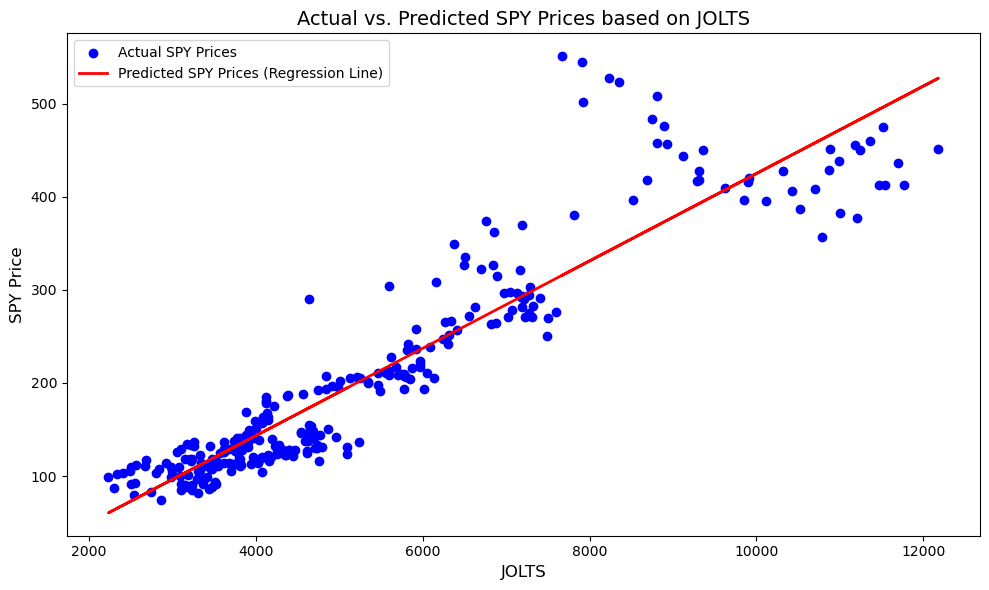

In [70]:
# Generate predicted SPY prices from the JOLTS data (using the regression model)
y_pred_all = model.predict(X)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual SPY prices
plt.scatter(merged_data['JTSJOL'], merged_data['Price'], color='blue', label='Actual SPY Prices')

# Plot of predicted SPY prices (regression line)
plt.plot(merged_data['JTSJOL'], y_pred_all, color='red', label='Predicted SPY Prices (Regression Line)', linewidth=2)

# Add labels and title
plt.title('Actual vs. Predicted SPY Prices based on JOLTS', fontsize=14)
plt.xlabel('JOLTS', fontsize=12)
plt.ylabel('SPY Price', fontsize=12)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [22]:
# Display first few rows to understand the structure of the data
spy_data.head(), jolts_data.tail()

(             Price    Open    High     Low     Vol. Change %
 Date                                                        
 2024-09-01  562.01  563.68  563.68  539.44  463.88M   -0.30%
 2024-08-01  563.68  552.57  564.20  510.27   62.70M    2.34%
 2024-07-01  550.81  545.63  565.16  537.45    1.04B    1.21%
 2024-06-01  544.22  529.02  550.28  522.60  888.92M    3.20%
 2024-05-01  527.37  501.38  533.07  499.55    1.15B    5.06%,
                   JTSJOL    25 MA    50 MA        90 MA
 observation_date                                       
 2024-03-01          8355  9977.12  9226.06  8117.522222
 2024-04-01          7919  9806.60  9244.96  8143.388889
 2024-05-01          8230  9664.88  9291.08  8168.488889
 2024-06-01          7910  9522.36  9356.54  8190.111111
 2024-07-01          7673  9381.12  9398.14  8212.955556)

In [23]:
print(spy_data.columns)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [73]:
# First plot: Stop SPY actual prices at 2022-10-01
spy_filtered = spy_data[spy_data.index <= '2022-10-01']  # Filter actual data

# Merge the filtered SPY and JOLTS data on their indices (use the index for merging)
merged_all_dates = pd.merge(spy_filtered[['Price']], jolts_data, left_index=True, right_index=True, how='right')

# Remove rows where 'Price' is NaN to avoid issues in the regression model
merged_all_dates_clean = merged_all_dates.dropna(subset=['Price'])

# Prepare the data for regression analysis
X_all = merged_all_dates_clean[['JTSJOL']].values
y_all = merged_all_dates_clean['Price'].values

# Fit a new regression model using the full JOLTS date range and SPY prices until Oct 2022
model_all_dates = LinearRegression()
model_all_dates.fit(X_all, y_all)

# Predict SPY prices for the extended JOLTS data range (until July 2024)
future_date = pd.to_datetime('2024-07-01')
jolts_extended = jolts_data[jolts_data.index <= future_date]
X_extended = jolts_extended[['JTSJOL']].values
y_pred_extended = model_all_dates.predict(X_extended)

# Merge the predicted SPY prices with the extended JOLTS data for visualization
merged_extended = jolts_extended.copy()
merged_extended['Predicted_SPY_Price'] = y_pred_extended

# Plot the figure where actual SPY prices stop at 2022-10-01
fig1 = go.Figure()

# Add SPY actual prices line (until October 2022)
fig1.add_trace(go.Scatter(x=merged_all_dates_clean.index, y=merged_all_dates_clean['Price'], mode='lines', name='Actual SPY Prices', yaxis='y1', line=dict(color='black', width=2)))

# Add predicted SPY prices line (extended until 2024) with a different color and dash
fig1.add_trace(go.Scatter(x=merged_extended.index, y=merged_extended['Predicted_SPY_Price'], mode='lines', name='Predicted SPY Prices (Extended)', yaxis='y1', line=dict(color='red', dash='dash', width=6)))

# Add JOLTS line on the right y-axis
fig1.add_trace(go.Scatter(x=merged_extended.index, y=merged_extended['JTSJOL'], mode='lines', name='JOLTS', yaxis='y2', line=dict(color='blue', width=2)))

# Update layout for first figure
fig1.update_layout(
    title='SPY Prices vs. JOLTS Trends (SPY Actual Prices stop on 2022-10-01)',
    xaxis_title='Date',
    yaxis=dict(title='SPY Price', side='left', showgrid=False),
    yaxis2=dict(title='JOLTS', overlaying='y', side='right'),
    legend_title='Data',
    hovermode='x unified'
)

# Show the first plot
fig1.show()


In [74]:
# First plot: CONTINUE ON THIS GRAPH
spy_filtered = spy_data[spy_data.index <= '2024-07-01']  # Filter actual data

# Merge the filtered SPY and JOLTS data on their indices (use the index for merging)
merged_all_dates = pd.merge(spy_filtered[['Price']], jolts_data, left_index=True, right_index=True, how='right')

# Remove rows where 'Price' is NaN to avoid issues in the regression model
merged_all_dates_clean = merged_all_dates.dropna(subset=['Price'])

# Prepare the data for regression analysis
X_all = merged_all_dates_clean[['JTSJOL']].values
y_all = merged_all_dates_clean['Price'].values

# Fit a new regression model using the full JOLTS date range and SPY prices until Oct 2022
model_all_dates = LinearRegression()
model_all_dates.fit(X_all, y_all)

# Predict SPY prices for the extended JOLTS data range (until July 2024)
future_date = pd.to_datetime('2024-07-01')
jolts_extended = jolts_data[jolts_data.index <= future_date]
X_extended = jolts_extended[['JTSJOL']].values
y_pred_extended = model_all_dates.predict(X_extended)

# Merge the predicted SPY prices with the extended JOLTS data for visualization
merged_extended = jolts_extended.copy()
merged_extended['Predicted_SPY_Price'] = y_pred_extended

# Plot the figure where actual SPY prices stop at 2022-10-01
fig1 = go.Figure()

# Add SPY actual prices line (until October 2022)
fig1.add_trace(go.Scatter(x=merged_all_dates_clean.index, y=merged_all_dates_clean['Price'], mode='lines', name='Actual SPY Prices', yaxis='y1', line=dict(color='black', width=2)))

# Add predicted SPY prices line (extended until 2024) with a different color and dash
fig1.add_trace(go.Scatter(x=merged_extended.index, y=merged_extended['Predicted_SPY_Price'], mode='lines', name='Predicted SPY Prices (Extended)', yaxis='y1', line=dict(color='red', dash='dash', width=6)))

# Add JOLTS line on the right y-axis
fig1.add_trace(go.Scatter(x=merged_extended.index, y=merged_extended['JTSJOL'], mode='lines', name='JOLTS', yaxis='y2', line=dict(color='blue', width=2)))

# Update layout for first figure
fig1.update_layout(
    title='SPY Prices vs. JOLTS Trends (SPY Actual Prices stop on 2022-10-01)',
    xaxis_title='Date',
    yaxis=dict(title='SPY Price', side='left', showgrid=False),
    yaxis2=dict(title='JOLTS', overlaying='y', side='right'),
    legend_title='Data',
    hovermode='x unified'
)

# Show the first plot
fig1.show()
